# Simulating the Effects of Non-Representative Sampling and Sample Size

What I find exhilarating about constructing Python simulations is that they can bring to life concepts and frameworks of how we understand the world in a creative, tangible way.  

Today, I'll run through a two simulations. The purpose of the first is to demonstrate the effect of a non-representative sample, one of many types of sampling bias. In real life, this could include over/underrepresentation of subgroups, voluntary bias, or non-response bias, and is common when looking to make sampling more convenient and economical (e.g., surveying people on the way out of the store or on the street, web-intercept surveys, club or class members, etc.). The purpose of the second is to illustrate sample size effect by simulating subsampling of a real health dataset. My analysis includes basic for loops, generating random normal distributions using random.normal and random.choice, generating histograms using seaborn, and drawing statistical observations. 

In [18]:
# Import relevant packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

### Simulation 1: Non-Representative Sampling Effect

The imaginary town of Seaborn (population: 50,000) is looking to renovate its public library. Before moving forward, its mayor wants to understand the average number of books per year its citizens read. To get an understanding of book-reading, the mayor decides to survey the town's book club members at the public library, which is cheaper, quicker, and more convenient than collecting a random sample of the town's population. Book club members make up 20% of Seaborn's population. The target population is the total population of Seaborn and let's say, as this is a hypothetical, we know the true means and standard deviations of the total population of Seaborn and those of book club members. 

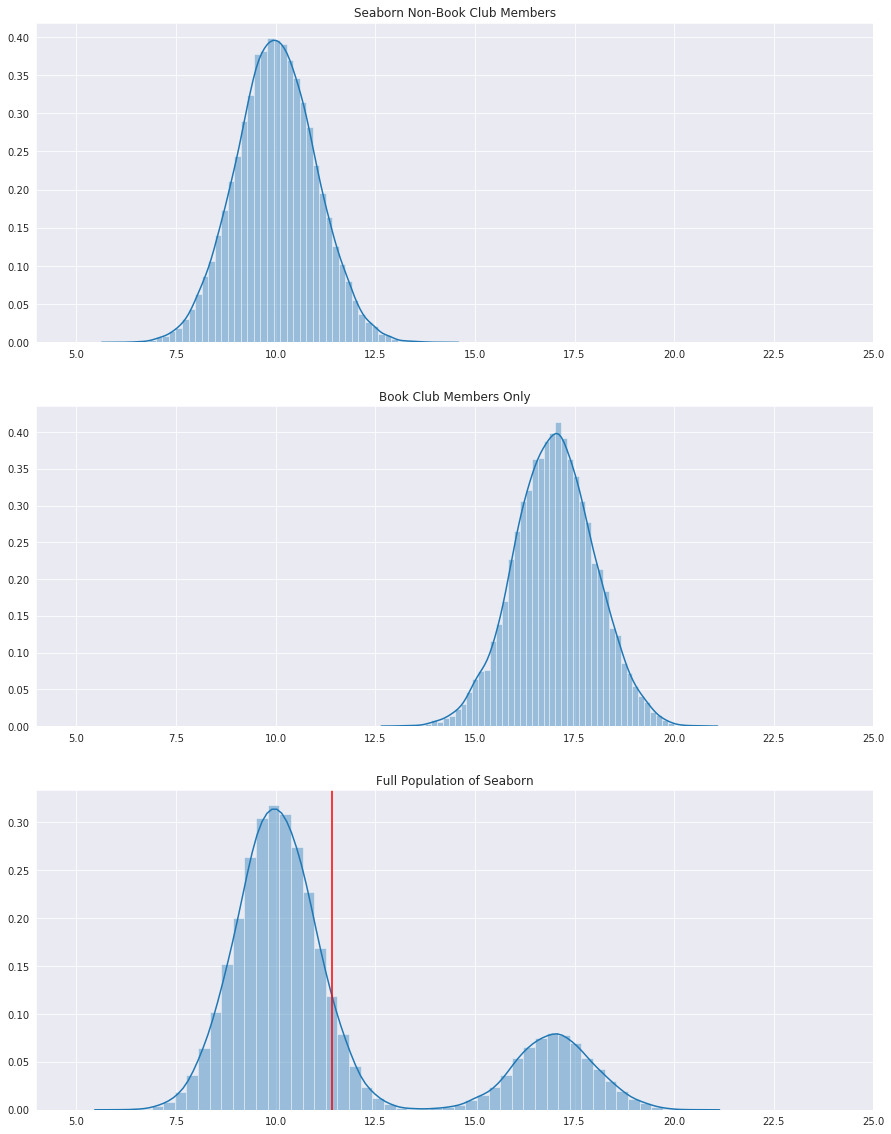

In [19]:
# Set variables for Seaborn total and book club population for number of books read per year
mean_seaborn = 10
sd_seaborn = 1
mean_bc = 17 
sd_bc = 1 
bc_percentage = .2
total_pop = 50000

# Create two normally distributed subgroups using np.random.normal. Make sure to set the type of the last argument to int.
seaborn = np.random.normal(mean_seaborn, sd_seaborn, int(total_pop * (1 - bc_percentage)))
bc = np.random.normal(mean_bc, sd_bc, int(total_pop * (bc_percentage)))

# Create the population from the subgroups
population = np.append(seaborn, bc)

# Set figure size
plt.figure(figsize=(15,20))

# Plot town of Seaborn only. Use plt.xlim to set x-axis parameters
plt.subplot(3,1,1)
sns.distplot(seaborn)
plt.title("Seaborn Non-Book Club Members")
plt.xlim([4,25])

# Plot the book club members only
plt.subplot(3,1,2)
sns.distplot(bc)
plt.title("Book Club Members Only")
plt.xlim([4,25])

# Plot both groups together. Plot a vertical line at the mean of the combine population using axvline
plt.subplot(3,1,3)
sns.distplot(population)
plt.title("Full Population of Seaborn")
plt.axvline(x = np.mean(population), color = "red")
plt.xlim([4,25])

plt.show()

The mean of the total population is just over 11 books per year.

In [20]:
print(np.mean(population))

11.403665852053567


First, let's simulate sampling using a random, unbiased sample of the entire population of Seaborn. Let's run 10,000 simulations of a sample size of 100. 

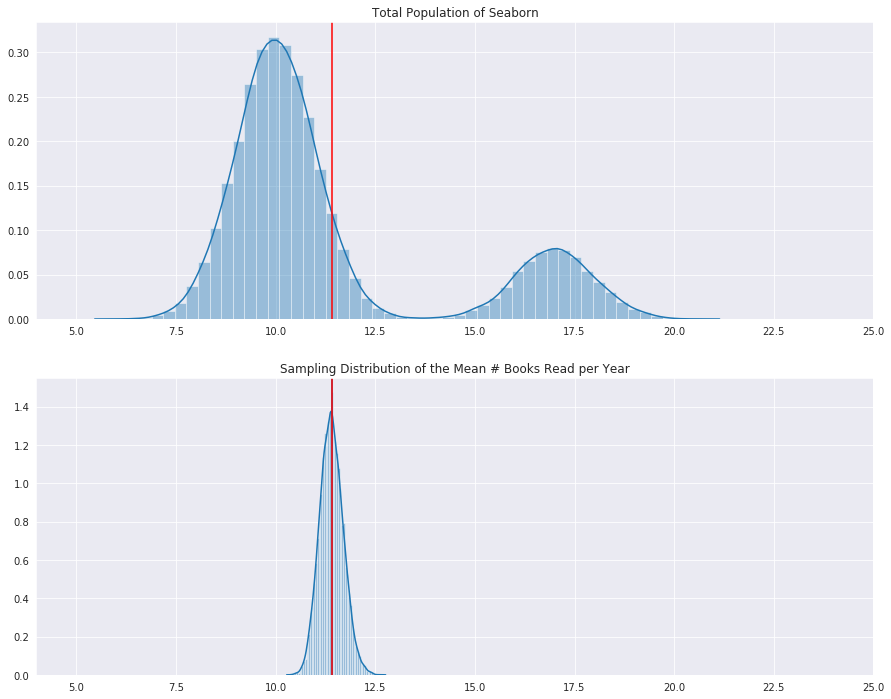

In [21]:
# Set simulation variables
number_samples = 10000
sample_size = 100

# Create an empty shell array to collect mean distributions. Run 10,000 simulations of random sampling in the total population.  
mean_dist = np.empty(number_samples)
for n in range(number_samples):
    random = np.random.choice(population, sample_size)
    mean_dist[n] = np.mean(random)
    
# Plot the population and the biased sampling distribution
plt.figure(figsize = (15,12))

# Plot the population distribution, including vertical line at the mean
plt.subplot(2,1,1)
sns.distplot(population)
plt.title("Total Population of Seaborn")
plt.axvline(x = np.mean(population), color = "red")
plt.xlim([4,25])

# Plot the sampling distribution, including vertical lines at the population and sample means
plt.subplot(2,1,2)
sns.distplot(mean_dist)
plt.title("Sampling Distribution of the Mean # Books Read per Year")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(mean_dist), color = "red")
plt.xlim([4,25])

plt.show()

In the plot of the total population at the top, the bump in the right hand-side comes from book club members who are naturally more avid readers. In the plot of the sampling distribution on the bottom, notice that our sampling mean is exactly aligned with the population mean of roughly 11 books per year since we've used a random, unbiased sample of the total population. We could get an even tighter distribution around this mean if we bumped up our sample size. 

Next, let's simulate sampling using the cheaper, quicker, more convenient method of a biased sample of the town's book club members. Let's run 10,000 simulations of a sample size of 100.  

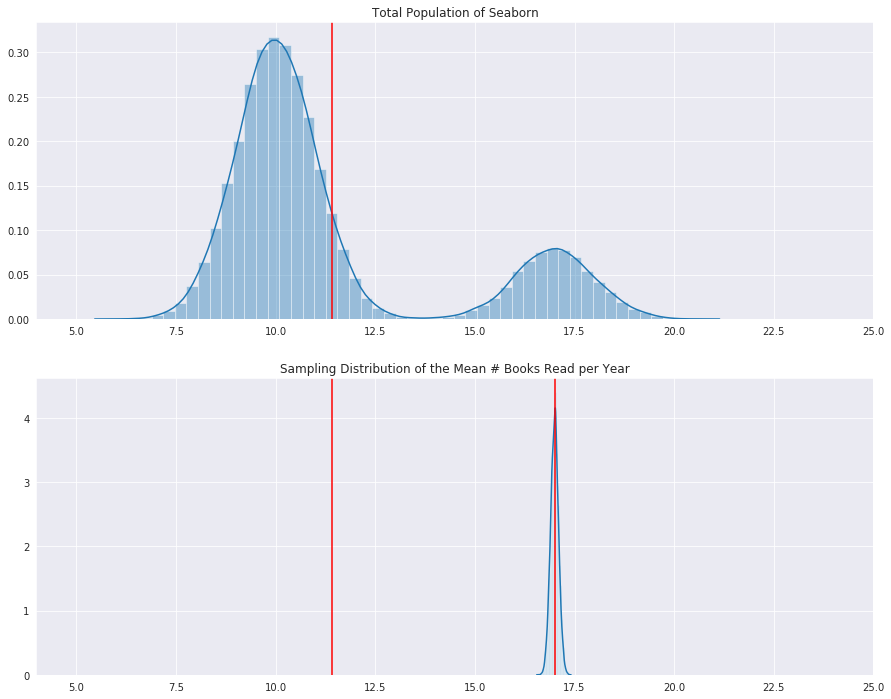

In [22]:
# Set simulation variables
number_samples = 10000
sample_size = 100

# Create an empty shell array to collect mean distributions. Run 10,000 simulations sampling in the book club population. 
mean_dist = np.empty(number_samples)
for n in range(number_samples):
    random = np.random.choice(bc, sample_size)
    mean_dist[n] = np.mean(random)
    
# Plot the population and the biased sampling distribution
plt.figure(figsize = (15,12))

# Plot the population distribution, including vertical line at the mean
plt.subplot(2,1,1)
sns.distplot(population)
plt.title("Total Population of Seaborn")
plt.axvline(x = np.mean(population), color = "red")
plt.xlim([4,25])

# Plot the sampling distribution, including vertical lines at the population and sample means
plt.subplot(2,1,2)
sns.distplot(mean_dist)
plt.title("Sampling Distribution of the Mean # Books Read per Year")
plt.axvline(x = np.mean(population), color = "red")
plt.axvline(x = np.mean(mean_dist), color = "red")
plt.xlim([4,25])

plt.show()

In [23]:
print(np.mean(bc))

16.998289953793613


This time, in the bottom plot of the sampling distribution, notice that our sampling mean is significantly higher (roughly 17 books per year) than our population mean as we're using a biased sample of book club members, who are naturally more avid readers than the rest of Seaborn's population. As this could affect planning and budgetting for the library renovation, if we are to sample only book club members, we could apply techniques like weighting to adjust for the book-reading bias. 

### Simulation 2: Sample Size Effect in Subsampling 

I simulate two researchers subsampling from the National Health and Nutrition Examination Survey (NHANES) 2016 dataset. NHANES is a yearly national cross-sectional study conducted by the CDC that asssses the health of the U.S. population (https://www.cdc.gov/nchs/nhanes/index.htm). It uses cluster sampling and collects thousands of health, diet, demographic, and socioeconomic variables for each person. 

Today, I'll focus on the variable body weight (BMXWT). If you'd like to know more about the other variables, you can check out the NHANES codebook (https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Examination&CycleBeginYear=2015). I'll simulate researchers subsampling using a sample size of 100 and a sample size of 400 to demonstrate the effect of sample size on randomness and precision.  

In [24]:
# Set display option so columns won't be cut off
pd.set_option("display.max_columns", 100)

# Read file as pandas dataframe
health = pd.read_csv("https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv")

# Check the first few rows
health.head(5)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [25]:
# Check the last few rows. Notice there are 5,734 observations.  
health.tail(5)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,2.0,1,49050.06,2,132,2.97,154.0,56.0,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0
5734,93702,1.0,NaN,2.0,2,2,24,3,1.0,5.0,5.0,3,107361.91,2,119,3.54,118.0,66.0,114.0,68.0,58.3,165.0,21.4,38.2,33.5,26.2,72.5,2.0


In [26]:
# Check the column headings to see the variables included. 
health.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [27]:
# Check the dimensions of the dataframe. It includes 5,735 rows and 28 columns. 
health.shape

(5735, 28)

In [28]:
# We'll be working with seaborn plots. Set the style to darkgrid. 
sns.set_style("darkgrid")

In [29]:
# Set subsample size
s = 100

# Empty shell series to hold values of subsample mean differences
diff_weight = []

# Set for loop to run 2 subsamples of size 100 using .sample. Add the difference of the means of BMI to the array diff set above using .append
for n in range(1000):
    da = health.sample(2*s) 
    da1 = da.iloc[0:s, :]  
    da2 = da.iloc[s:, :]
    diff_weight.append(da1.BMXWT.mean() - da2.BMXWT.mean())  

Let's plot the differences of mean weights from the simulation of 1,000 runs of subsampling using a sample size of 100. 

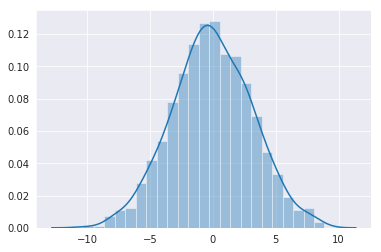

In [30]:
sns.distplot(diff_weight)

In [31]:
# Let's look at the summary statistics
pd.Series(diff_weight).describe()

count    1000.000000
mean       -0.056543
std         3.158583
min       -10.296523
25%        -2.114350
50%        -0.111943
75%         2.123412
max         8.883586
dtype: float64

If two different researchers measured peoples' weights by each using a sample of 100, their measurements would typically differ by 3 kg, the standard deviation of the differences in mean weight, due to chance fluctuations. Increasing the sample size would reduce these random fluctuations. 

What if each researcher used a sample size of 400? Let's see below. 

In [32]:
# Set 1st subsample size
s = 400

# Empty shell series to hold values of subsample mean differences
diff_weight = []

# Set for loop to run 2 subsamples of size 100 using .sample method. Add the difference of the means of BMI to the array diff set above using .append
for n in range(1000):
    da = health.sample(2*s) 
    da1 = da.iloc[0:s, :]  
    da2 = da.iloc[s:, :]
    diff_weight.append(da1.BMXWT.mean() - da2.BMXWT.mean())  

Let's plot the differences of mean weights from the simulation of 1,000 runs of subsampling using a sample size of 400. We can see from the x-axis that the plot has tightened up significantly. 

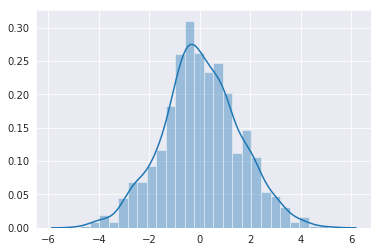

In [33]:
sns.distplot(diff_weight)

In [34]:
# Let's look at the summary statistics
pd.Series(diff_weight).describe()

count    1000.000000
mean        0.043043
std         1.531381
min        -4.746348
25%        -0.901356
50%        -0.013046
75%         0.994313
max         5.058942
dtype: float64

This time, with a larger sample size of 400, the standard deviation in the difference in mean weight is cut roughly in half to 1.6 kg. A sample size of 400 rather than 100 reduces random fluctuation and enables us to estimate the population mean weight more precisely. This logic applies to any of the other measures, such as height and systolic or diastolic blood pressure, as well as correlations between variables.  